## Data Analysis

In [52]:
# Step 0. Import libraries and custom modules
# Basics ---------------------------------------------------------------
import os
# Data -----------------------------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Modules --------------------------------------------------------------
def count_nan_zeros(df):
    """Count NaNs and zeros in each column of a DataFrame"""
    
    nan_zeros = {}
    for col in df.columns:
        numeric = False
        total_count = len(df[col])
        nan_count = df[col].isna().sum()
        pct_nan = round(nan_count / total_count * 100,1)
        zero_count = (df[col] == 0).sum()
        pct_zero = round(zero_count / total_count * 100,1)
        unique_count = df[col].nunique()
        if df[col].dtype.kind in 'biufc':
            numeric = True
        
        nan_zeros[col] = {'NaNs': nan_count,
                          'pct_NaNs': pct_nan, 
                          'Zeros': zero_count,
                          'pct_Zeros': pct_zero,
                          'Numeric': numeric,
                          'Unique Values': unique_count}
    
    return pd.DataFrame.from_dict(nan_zeros, orient='index')

In [3]:
# Step 1. Load data ----------------------------------------------------
# 1.1 Open file and get basic info
df_raw = pd.read_csv('../data/city_day.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
# 1.2 Get a sample
df_raw.sample(10, random_state=2024)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
12434,Gurugram,2015-12-31,NaN,NaN,12.63,13.98,14.61,NaN,1.43,5.41,28.88,NaN,NaN,NaN,NaN,NaN
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
12041,Delhi,2019-12-18,144.00,214.88,29.59,44.41,48.79,51.81,1.24,7.98,32.08,3.47,22.85,0.16,273.0,Poor
4050,Amritsar,2019-11-01,154.49,235.28,17.73,9.94,27.64,12.81,0.37,19.27,15.38,3.53,4.21,2.00,313.0,Very Poor
15462,Hyderabad,2017-06-03,13.78,42.98,8.40,19.42,6.83,14.37,0.07,2.33,53.33,0.01,0.33,0.04,103.0,Moderate
28765,Visakhapatnam,2018-05-28,25.10,76.72,10.74,30.18,24.95,12.93,0.48,13.46,13.69,6.47,15.26,2.56,56.0,Satisfactory
24709,Patna,2017-09-23,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
14429,Guwahati,2020-02-01,123.80,184.52,28.23,10.06,57.12,18.14,1.21,13.22,18.75,0.69,NaN,NaN,250.0,Poor
24449,Patna,2017-01-06,238.36,NaN,34.01,24.54,58.56,NaN,2.30,11.88,5.03,0.24,0.73,0.40,403.0,Severe
12333,Ernakulam,2020-04-26,18.44,44.38,15.45,NaN,13.95,38.43,1.15,2.89,NaN,0.09,0.07,0.00,59.0,Satisfactory


In [53]:
# 1.3 Count NaNs and zeros per column
display(count_nan_zeros(df_raw))

,NaNs,pct_NaNs,Zeros,pct_Zeros,Numeric,Unique Values
City,0,0.0,0,0.0,False,26
Date,0,0.0,0,0.0,False,2009
PM2.5,4598,15.6,0,0.0,True,11716
PM10,11140,37.7,0,0.0,True,12571
NO,3582,12.1,0,0.0,True,5776
NO2,3585,12.1,0,0.0,True,7404
NOx,4185,14.2,740,2.5,True,8156
NH3,10328,35.0,0,0.0,True,5922
CO,2059,7.0,2328,7.9,True,1779
SO2,3854,13.1,0,0.0,True,4761


In [27]:
# 1.4 List unique values
display(df_raw['City'].unique())
display(df_raw['AQI_Bucket'].unique())

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [30]:
display(df_raw[['AQI','AQI_Bucket']].dropna().drop_duplicates().sort_values(by='AQI'))

,AQI,AQI_Bucket
26329,13.0,Good
25810,14.0,Good
26309,15.0,Good
26006,16.0,Good
25970,17.0,Good
...,...,...
1463,1719.0,Severe
1048,1747.0,Severe
560,1842.0,Severe
1136,1917.0,Severe


In [44]:
display(
    df_raw[['AQI','AQI_Bucket']]
    .dropna()
    .groupby('AQI_Bucket')['AQI']
    .agg(['min','max','mean','count'])
    .reset_index()
    .sort_values(by='min')
    .assign(
        count_pct = lambda x: round(x['count'] / x['count'].sum() * 100,1),
        mean = lambda x: round(x['mean'], 1)
    )
)

,AQI_Bucket,min,max,mean,count,count_pct
0,Good,13.0,50.0,40.3,1341,5.4
3,Satisfactory,51.0,100.0,76.8,8224,33.1
1,Moderate,101.0,200.0,136.7,8829,35.5
2,Poor,201.0,300.0,245.7,2781,11.2
5,Very Poor,301.0,400.0,343.0,2337,9.4
4,Severe,401.0,2049.0,567.9,1338,5.4


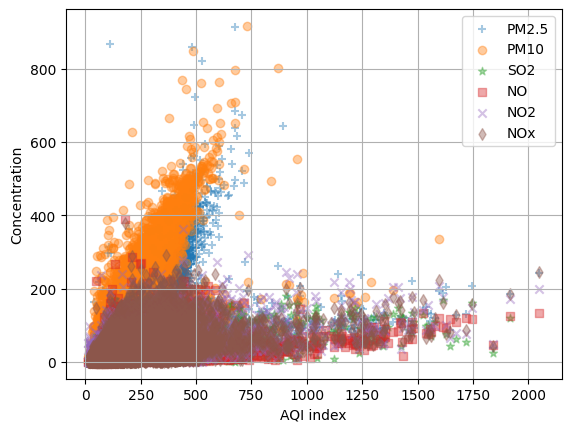

In [68]:
fig, ax = plt.subplots()
ax.scatter(df_raw['AQI'],df_raw['PM2.5'], marker='+', alpha=0.4)
ax.scatter(df_raw['AQI'], df_raw['PM10'], marker='o', alpha=0.4)
ax.scatter(df_raw['AQI'], df_raw['SO2'], marker='*', alpha=0.4)
ax.scatter(df_raw['AQI'], df_raw['NO'], marker='s', alpha=0.4)
ax.scatter(df_raw['AQI'], df_raw['NO2'], marker='x', alpha=0.4)
ax.scatter(df_raw['AQI'], df_raw['NOx'], marker='d', alpha=0.4)
ax.grid(True)
ax.set_xlabel('AQI index')
ax.set_ylabel('Concentration')
ax.legend(['PM2.5','PM10','SO2','NO','NO2','NOx'])
plt.show()

In [73]:
df_temp = (
    df_raw
    .assign(date_ix = pd.to_datetime(df_raw['Date']))
    .set_index('date_ix')
    .sort_index()
    .drop(['Date'], axis=1)
    .plot()
)
fig, ax = plt.subplots(figsize=(20, 10))

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
date_ix,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-01,Chennai,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
2015-01-01,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
2015-01-01,Lucknow,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN
2015-01-01,Mumbai,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,Amaravati,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
2020-07-01,Talcher,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0,Moderate
2020-07-01,Thiruvananthapuram,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0,Good
